# Tabular Experiments -- Discretisation and Binarisation Purity #

The experiments are executed by selecting one of the data sets via uncommenting
its name in one of the notebook cells below.

In [1]:
! mkdir -p _figures

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('text', usetex=True)
plt.style.use('seaborn')

%matplotlib inline

In [2]:
import numpy as np
import sklearn.datasets as skl_data

import helpers

22-Jun-03 15:32:32 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.


In [3]:
data_sets = {
    'wine': {
        'data': skl_data.load_wine(return_X_y=True)[0],
        'labels': skl_data.load_wine(return_X_y=True)[1],
        'tree_leaves': 16,
        'is_classification': True
    },
    'breast_cancer': {
        'data': skl_data.load_breast_cancer(return_X_y=True)[0],
        'labels': skl_data.load_breast_cancer(return_X_y=True)[1],
        'tree_leaves': 32,
        'is_classification': True
    },
    'boston': {
        'data': skl_data.load_boston(return_X_y=True)[0],
        'labels': skl_data.load_boston(return_X_y=True)[1],
        'tree_leaves': 16,  # 32 # 16/64
        'is_classification': False
    },
    'diabetes': {
        'data': skl_data.load_diabetes(return_X_y=True)[0],
        'labels': skl_data.load_diabetes(return_X_y=True)[1],
        'tree_leaves': 32,  # 256 # 32/64/128
        'is_classification': False
    }
}

In [4]:
distance_factor = 0.3
data_set_idx = 0

data_set = [
    'wine',
    'breast_cancer',
    'boston',
    'diabetes'
][data_set_idx]

In [5]:
discrete_result, global_binary_results, \
local_discrete_result, local_binary_results, \
n_d_g, n_b_g, n_d_l, n_b_l = helpers.get_lime(
    data_sets[data_set]['data'],
    data_sets[data_set]['labels'],
    classification=data_sets[data_set]['is_classification'],
    distance_factor=distance_factor)

Weighted homogeneity of global quartile discretisation: 0.0.
Unique discrete points count: 178.


Global weighted homogeneity of binarisation: 0.02575381694658207 +- 0.028929805738776494.
Unique binary points count: 96.12359550561797 +- 22.849935571280398.


~+~+~+~+~+~+~+~+~+~+~+~+~+~+~+~+~+~+~+~+~+~+~+~+~+~+~+~+~+~+~+~+~+~+~+~+~+~+~+~+


Weighted homogeneity of local quartile discretisations: 0.0 +- 0.0.
Unique discrete points count: 117.06741573033707 +- 31.977097757019784.


Local weighted homogeneity of binarisation: 0.03376988573614901 +- 0.027783311464847273.
Unique binary points count: 93.08426966292134 +- 22.854416625634276.


In [6]:
print(f'global discretisation: {n_d_g:d}\n'
      f'global binarisation: {n_b_g:d}\n'
      f'local discretisation: {n_d_l:d}\n'
      f'local binarisation: {n_b_l:d}\n')

global discretisation: 178
global binarisation: 127
local discretisation: 152
local binarisation: 127



In [7]:
n_disc_fn = 4**data_sets[data_set]['data'].shape[1]
n_bin_fn = 2**data_sets[data_set]['data'].shape[1]

In [8]:
tree_global, tree_global_neighbourhood = helpers.get_tree_global(
    data_sets[data_set]['data'],
    data_sets[data_set]['labels'],
    data_sets[data_set]['tree_leaves'],
    classification=data_sets[data_set]['is_classification'],
    distance_factor=distance_factor)

Global weighted homogeneity of tree-based discretisation (16 leaves): 0.0.
Local weighted homogeneity of tree-based discretisation (16 leaves): 0.0 +- 0.0.
Global weighted homogeneity of tree-based discretisation (15 leaves): 0.0.
Local weighted homogeneity of tree-based discretisation (15 leaves): 0.0 +- 0.0.
Global weighted homogeneity of tree-based discretisation (14 leaves): 0.0.
Local weighted homogeneity of tree-based discretisation (14 leaves): 0.0 +- 0.0.
Global weighted homogeneity of tree-based discretisation (13 leaves): 0.0.
Local weighted homogeneity of tree-based discretisation (13 leaves): 0.0 +- 0.0.
Global weighted homogeneity of tree-based discretisation (12 leaves): 0.0.
Local weighted homogeneity of tree-based discretisation (12 leaves): 0.0 +- 0.0.
Global weighted homogeneity of tree-based discretisation (11 leaves): 0.011235955056179775.
Local weighted homogeneity of tree-based discretisation (11 leaves): 0.012252258339443517 +- 0.006334709807118946.
Global weight

In [9]:
tree_local = helpers.get_tree_local(
    data_sets[data_set]['data'],
    data_sets[data_set]['labels'],
    data_sets[data_set]['tree_leaves'],
    classification=data_sets[data_set]['is_classification'],
    distance_factor=distance_factor)

Local weighted homogeneity of tree-based discretisation (16 leaves): 0.0 +- 0.0.
Local weighted homogeneity of tree-based discretisation (15 leaves): 0.0 +- 0.0.
Local weighted homogeneity of tree-based discretisation (14 leaves): 0.0 +- 0.0.
Local weighted homogeneity of tree-based discretisation (13 leaves): 0.0 +- 0.0.
Local weighted homogeneity of tree-based discretisation (12 leaves): 0.0 +- 0.0.
Local weighted homogeneity of tree-based discretisation (11 leaves): 0.0 +- 0.0.
Local weighted homogeneity of tree-based discretisation (10 leaves): 3.770454716838851e-05 +- 0.0005016263741667322.
Local weighted homogeneity of tree-based discretisation (9 leaves): 0.001370400671899986 +- 0.005388266143382816.
Local weighted homogeneity of tree-based discretisation (8 leaves): 0.006161503788244305 +- 0.023843622763960504.
Local weighted homogeneity of tree-based discretisation (7 leaves): 0.018498180532214303 +- 0.05333756907788222.
Local weighted homogeneity of tree-based discretisation 

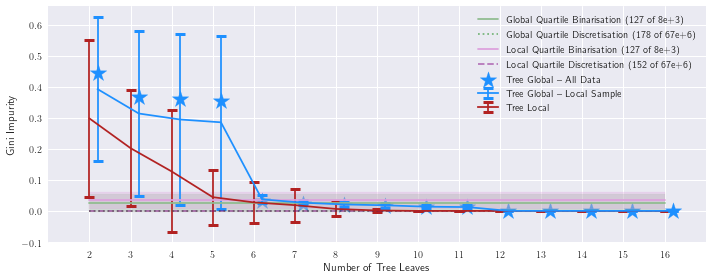

In [10]:
# NBVAL_IGNORE_OUTPUT
fig = plt.figure(figsize=(10, 4))  # constrained_layout=True

jitter = .2

keys = sorted(list(tree_local.keys()))
x_local, y_local_mean, y_local_std = [], [], []
for key in keys:
    x_local.append(key)
    y_local_mean.append(np.mean(tree_local[key]))
    y_local_std.append(np.std(tree_local[key]))

plt.errorbar(x_local, y_local_mean, yerr=y_local_std,
             solid_capstyle='projecting', capsize=5, capthick=3,
             c='firebrick',  # cornflowerblue
             label='Tree Local')

keys = sorted(list(tree_global.keys()))
key_no = len(keys)
x_global, y_global = [], []
y_global_mean, y_global_std = [], []
for key in keys:
    x_global.append(key + jitter)
    y_global.append(tree_global[key])

    y_global_mean.append(np.mean(tree_global_neighbourhood[key]))
    y_global_std.append(np.std(tree_global_neighbourhood[key]))
plt.scatter(x_global, y_global,
            marker='*', s=300, alpha=1.0, c='dodgerblue',  # 'darkseagreen' # '-'
            label='Tree Global – All Data')

plt.errorbar(x_global, y_global_mean, yerr=y_global_std,
             solid_capstyle='projecting', capsize=5, capthick=3,
             c='dodgerblue',
             label='Tree Global – Local Sample')

#############################################

mm, ms = np.mean(global_binary_results), np.std(global_binary_results)
pp = plt.plot(keys, key_no * [mm],  # LIME MSE
              c='darkseagreen',
              label=f'Global Quartile Binarisation ({n_b_g} of {helpers.millify(n_bin_fn)})')
lime_c = pp[-1].get_color()
plt.fill_between(keys, key_no * [mm - ms], key_no * [mm + ms],
                 alpha=0.3, color=lime_c)  # y + error

plt.plot(keys, key_no * [discrete_result],
         alpha=0.5, c='g', linestyle=':',
         label=f'Global Quartile Discretisation ({n_d_g} of {helpers.millify(n_disc_fn)})')

mm, ms = np.mean(local_binary_results), np.std(local_binary_results)
pp = plt.plot(keys, key_no * [mm],  # LIME MSE
              c='plum',
              label=f'Local Quartile Binarisation ({n_b_l} of {helpers.millify(n_bin_fn)})')
lime_c = pp[-1].get_color()
plt.fill_between(keys, key_no * [mm - ms], key_no * [mm + ms],
                 alpha=0.3, color=lime_c)  # y + error

mm, ms = np.mean(local_discrete_result), np.std(local_discrete_result)
pp = plt.plot(keys, key_no * [mm],  # LIME MSE
              alpha=0.5, c='purple', linestyle='--',
              label=f'Local Quartile Discretisation ({n_d_l} of {helpers.millify(n_disc_fn)})')
lime_c = pp[-1].get_color()
plt.fill_between(keys, key_no * [mm - ms], key_no * [mm + ms],
                 alpha=0.3, color=lime_c)  # y + error

# Gini purity
plt.ylabel('Gini Impurity' if data_sets[data_set]['is_classification'] else
           'Mean Squared Error')
# Tree leaves
plt.xlabel('Number of Tree Leaves')

plt.xticks(np.arange(
    int(data_sets[data_set]['tree_leaves'] / 8),
    data_sets[data_set]['tree_leaves'] + 1,
    step=int(data_sets[data_set]['tree_leaves'] / 16)
))
plt.xlim((2 - int(data_sets[data_set]['tree_leaves'] / 16),
          data_sets[data_set]['tree_leaves'] + int(data_sets[data_set]['tree_leaves'] / 16)))

plt.legend(loc='upper right')  # 'top right'

# Sort both labels and handles by labels
ax = fig.get_axes()[0]
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
plt.legend(handles, labels)

plt.tight_layout()

plt.savefig(f'_figures/intrep_tab_{data_set}_{distance_factor:1.1f}.pdf',
            transparent=False, dpi=300, bbox_inches='tight')